# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2020



# Στοιχεία Ομάδας
Αρ. Ομάδας: $01$ <br>
Μαρία Παναγιώτου, $03116703$ <br>
Κωνσταντίνος Αλεξάνδρου, $03116708$ <br>
Ματθαίος Φικάρδος, $03116705$ <br>

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.5MB 5.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 5.4 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=3208f3aaf86ae5098e7420b631c608ee826060a6ec02be27f242dff60998f578
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 1

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Murder by Natural Causes']
['"Mystery",  "Drama"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

In [ ]:
import joblib
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') #dump του corpus σε αρχείο

['corpus_tf_idf.pkl']

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.


In [ ]:
print(corpus_tf_idf.shape)

(5000, 48339)


Όπως παρατηρούμε τα δεδομένα μας έχουν τεράστιο όγκο και διαστατικότητα.

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


### Προβλέψεις χωρίς βελτιστοποίηση

Προχωράμε στην υλοποίηση της συνάρτησης content_recommender χωρίς να έχουμε βλετιστοποιήσει την TfidfVectorizer.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def content_recommender(target_movie, max_recommendations):
  ID = target_movie
  similarities = cosine_similarity(corpus_tf_idf[target_movie,:], corpus_tf_idf)
  similarities_sorted = np.argsort(similarities[0])[::-1] # argsort outputs sorted array indices (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) 
  print("Target Movie")
  print("ID:",ID)
  print("Title: ",titles[ID])
  print("Summary: ",corpus[ID])
  print("Categories: ",categories[ID])
  print('_____________________________')
  print('\n')
  for i in range(max_recommendations):
    recommend = similarities_sorted[i+1]
    print("Reccommended Movie ",i+1)
    print("ID:",recommend)
    print("Title: ",titles[recommend])
    print("Summary: ",corpus[recommend])
    print("Categories: ",categories[recommend])
    print('\n')

In [ ]:
content_recommender(2195,4) #κλήση της συνάρτησης

Target Movie
ID: 2195
Title:  ['Halloween']
Summary:   On Halloween in Haddonfield, Illinois, having already shown signs of psychopathic tendencies, ten-year-old Michael Myers  murders a school bully named Wesley , later his own sister Judith , his mother’s boyfriend Ronnie ([[William Forsythe , and Judith's boyfriend Steve . After one of the longest trials in the state’s history, Michael is found guilty of first degree murder and sent to Smith's Grove - Warren County Sanitarium under the care of child psychologist Dr. Samuel Loomis . Michael initially cooperates with Dr. Loomis, claiming no memory of the killings; his mother, Deborah , visits him regularly. After a year, Michael becomes fixated on his papier-mâché masks, closing himself off from everyone, even his mother. When Michael kills a nurse  as Deborah is leaving from one of her visits, she can no longer handle the situation and commits suicide. For the next fifteen years, Michael  continues making his masks and not speaking t

Εύκολα μπορούμε να παρατηρήσουμε ότι οι προτεινόμενες ταινίες δεν έχουν ιδιαίτερη σύνδεση με την αρχική ταινία. Αυτό σημαίνει πως ο TfidfVectorizer μας χρειάζεται βελτιστοποίηση.

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




### Κάποιες δοκιμές πριν τη βελτιστοποίηση

In [ ]:
content_recommender(1025,2)

Target Movie
ID: 1025
Title:  ['Tower of Evil']
Summary:  On Snape Island, a small isolated point off the English coast, a series of bizarre brutal murders have taken place. A team of archeologists decide to head to the island to uncover a possible Phoenician treasure, but instead they find a horrific mystery when someone, or something, begins to kill off the curious trespassers.
Categories:  ['"Horror",  "Slasher"']
_____________________________


Reccommended Movie  1
ID: 2628
Title:  ['Paradise Murdered']
Summary:  Off the southern coast of the Korean Peninsula, an island of 17 inhabitants exists. The so-called Paradise Island holds up to its name with its breath-taking mountains and sea coupled with good-natured people. No worries or stress holds for anyone who comes to visit this beautiful oasis. But this peace doesn’t last long as every single one of the inhabitants disappear one day without a single trace. Chaos initially breaks out when a blood-drenched corpse is found and ever

In [ ]:
content_recommender(669,2)

Target Movie
ID: 669
Title:  ['TMNT']
Summary:   Three thousand years ago, a warlord named Yaotl and his four generals discover a portal opening into a parallel universe which is said to have a great power. The warlord becomes immortal from the power, but his four generals are turned to stone. The portal releases 13 immortal monsters that destroy Yaotl's army as well as his enemies. In the present, the Teenage Mutant Ninja Turtles have grown apart. After defeating the Shredder, Master Splinter has sent Leonardo to Central America for training. Donatello works as an IT specialist, Michelangelo works as a birthday party entertainer called "Cowabunga Carl" and Raphael fights crime at night as the vigilante "Nightwatcher". April O'Neil operates a company that locates and acquires relics for collectors with the help of her boyfriend, Casey Jones. During a business trip to Central America, April tells Leonardo that the turtles have drifted apart. April returns to New York with a statue for h

Για τα συγκεκριμένα παραδείγματα παίρνουμε σχετικά καλά αποτελέσματα με τον από recommender μας. Συγκεκριμένα για την πρώτη ταινία τα κοινά θέματα είναι ο φόνος και το νησί ("murder,kill,island") ενώ για τη δεύτερη μας πρότεινε άλλη μια ταινία με τα χελωνονιντζάκια.

### Βήματα Βελτιστοποίησης



1. Tokenization
2. Stopwords
3. Φιλτράρισμα punctuation μέσω συνάρτησης thorough filter
4. Stemming
5. TF-IDF Vectorizer με παραμέτρους συχνότητας

Ακολουθεί ο κώδικας, και στη συνέχεια η επεξήγηση των επιλογών μας για προεπεξεργασία.



In [ ]:
#εισαγωγή βιβλιοθηκών
import nltk
import io
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import string
nltk.download('wordnet')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')

#περαιτέρω φιλτράρισμα σημείων στίξης
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

#Εισαγωγή δικών μας stopwords που βοηθούν στη βελτιστοποίηση (lightly modified version of code: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) 
file1 = open("words.txt")  
# Use this to read file content as a stream:  
line = file1.read() 
useless = line.split() 
useless_words = stopwords.words('english') + list(string.punctuation) + useless #stopwords της αγγλικής, σημεία στίξης και δικές μας άχρηστες λέξεις


#συνάρτηση προεπεξεργασίας
def preprocessing_corpus(document):
  words = nltk.word_tokenize(document.lower()) #Βήμα 1
  filtered_words = [word for word in words if word not in useless_words]
  filtered_words = thorough_filter(words) # Βήμα 2
  
  porter_stemmer = PorterStemmer() 
  stem_words = [porter_stemmer.stem(word)for word in filtered_words] #Βήμα 3
  return (" ".join(stem_words))

stemmed_corpus = [preprocessing_corpus(corp) for corp in corpus] #επεξεργασμένο corpus


#Vectorizer
vectorizer = TfidfVectorizer(max_df=0.50, min_df=0.01, stop_words= useless_words) #Βήμα 4+5
%time corpus_tf_idf = vectorizer.fit_transform(stemmed_corpus)
print("\n")
print("Μετά την επεξεργασία", corpus_tf_idf.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aaron', 'abbey', 'abbie', 'abby', 'abdul', 'abe', 'abel', 'abigail', 'abraham', 'abram', 'abst', 'accordance', 'according', 'across', 'act', 'actor', 'actually', 'ada', 'adah', 'adalberto', 'adaline', 'adam', 'adan', 'added', 'addie', 'adela', 'adelaida', 'adelaide', 'adele', 'adelia', 'adelina', 'adeline', 'adell', 'adella', 'adelle', 'adena', 'adina', 'adj', 'adolfo', 'ad

CPU times: user 983 ms, sys: 5 ms, total: 988 ms
Wall time: 992 ms


Μετά την επεξεργασία (5000, 2038)


Αποθήκευση του μειωμένου σε διαστάσεις corpus για μεταγενέστερη χρήση.

In [ ]:
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_proc.pkl')

['corpus_tf_idf_proc.pkl']

In [ ]:
content_recommender(1015,5)

Target Movie
ID: 1015
Title:  ['The Grinch Grinches the Cat in the Hat']
Summary:   The special opens on a morning so beautiful that even the Grinch wakes up in a good mood. But his cheerfulness is soon revoked when his mirror reflection in the rebukes him and reminds him that he's a Grinch and therefore shouldn't be cheerful, by repeating 'the Grinch's Oath' with him:   Out to prove himself to his reflection, the Grinch goes out to cause misfortune. Meanwhile, the Cat in the Hat goes on a picnic and soon crosses paths with the Grinch when he crashes into his car. The Grinch demands that the Cat "get this crate out of my way!", but when the Cat willingly and cheerfully agrees to his demands, the Grinch pursues him in a car chase for mistakenly calling him 'Mr. Green-Face'.  Realizing he's upset this person, the Cat returns to his house, safe and sound, but the Grinch tracks him there and messes with his voice using a device he has invented, "my Acoustical Anti-Audio Bleeper, otherwise 

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

### Παρατηρήσεις

Στόχος μας είναι η κατάλληλη επεξεργασία των κειμένων, ούτως ώστε να μειωθεί όσο γίνεται η διαστατικότητα τους, χωρίς να χαθεί χρήσιμη πληροφορία που μπορεί να χρησιμοποιηθεί από τον recommender για να φτιάξει συστάσεις. Ο recommender μας είναι content-based και βασίζεται στην ανάλυση των περιλήψεων των ταινιών.

<br>

**Βήμα 1:** Αρχικά πρέπει να "σπάσουμε" τα κείμενα σε λέξεις. Αυτό επιτυγχάνεται με το tokenizing. Χρησιμοποιώντας επιπλέον το ".lower()" μετατρέπουμε όλες τις λέξεις σε πεζά γράμματα, διότι ο υπολογιστής θεωρεί διαφορετική λέξη μία που ξεκινά με πεζό η κεφαλαίο γράμμα. Τώρα έχουμε όλες τις λέξεις ανεξάρτητες μεταξύ τους, και προχωράμε στο βήμα 2.

**Βήμα 2:** Σε κάθε κείμενο υπάρχουν λέξεις (stopwords) που δεν προσφέρουν πληροφορία, όπως είναι τα άρθρα, οι αντωνυμίες κ.λ.π. Μέσω βιβλιοθήκης φιλτράρουμε τις λέξεις αυτές της αγγλικής γλώσσας, αλλά για καλύτερα ακόμα αποτελέσματα, χρησιμοποιήσαμε επιπλέον λέξεις. Οι λέξεις αυτές είναι λέξεις που εμφανίζονται συχνά σε περιλήψεις ταινιών π.χ. plot, film. Μετά από δοκιμές με τον recommender μας, αφαιρούμε μια λίστα απο αγγλικά ονόματα, καθώς τα ονόματα των χαρακτήρων τις ταινίες, δεν έχουν σχέση με την πλοκή και οδηγούν σε λανθασμένα αποτελέσματα (π.χ. Peter Pan - Peter Parker, καμία σχέση στην πλοκή των ταινιών).

**Βήμα 3:** Στο κείμενο μας θεωρήθηκαν ως λέξεις σημεία στίξης, τα οποία θα πρέπει να αφαιρεθούν γιατί είναι άχρηστη πληροφορία που δεν προσφέρει κάτι στον recommender μας, παρά μόνο αυξάνει τις διαστάσεις του προβλήματος.

**Βήμα 4:** Ακολούθως έχουμε την επιλογή να προχωρήσουμε με Stemming ή Lemmatization του κειμένου μας. Αυτό που χρησιμοποιείται πιο συχνά είναι το Stemming, το οποίο αφαιρεί τις καταλήξεις από διάφορες λέξεις για να μπορεί ο υπολογιστής να αναγνωρίσει λέξεις που προέρχονται από την ίδια ρίζα και να μην τις θεωρήσει ως διαφορετικές. Μετά απο δοκιμές και με τις δύο μεθόδους, καταλήξαμε ότι τα καλύτερα αποτελέσματα δίνονται από το Stemming.

**Βήμα 5:** Οι επιλογές των μεθόδων και παραμέτρων της TfidfVectorizer μπορεί να έχουν δραματική επίδραση στην ποιότητα των συστάσεων και είναι διαφορετικές για κάθε dataset. Μετά απο πειραματισμό με διάφορες μεθόδους και τιμές παραμέτρων, καταλήξαμε να χρησιμοποιήσουμε τις **max_df** και **min_df**. 
H max_df εντοπίζει τις λέξεις που εμφανίζονται στο ποσοστό των περιλήψεων, μεγαλύτερο της τιμής που της δίνουμε και τις αφαιρεί. Η χρησιμότητα αυτού, βρίσκεται στο ότι εαν μια λέξη βρίσκεται σε τόσες πολλες περιλήψεις, μάλλον είναι κάποια γενική λέξη που χρησιμοποιείται συχνά και δεν παρέχει πληροφορία. Αντίστοιχα, η min_df αφαιρεί τις λέξεις που παρουσιάζονται σε ποσοστό περιλήψεων μικρότερο της τιμής που δίνουμε, με σκοπό να απομακρύνει πολύ σπάνιες λέξεις που είναι πιθανό τυχαίες και δεν έχουν σχέση με τη πλοκή ταινίας.
Μετά απο πειραματισμό, καταλήγουμε ότι για το δικό μας dataset, καμία τιμή πάνω από 0,5 για την max_df δε διαφοροποιεί τη διαστατικότητα μας, κι έτσι επιλέγουμε την max_df=0.5. Για την min_df βρήκάμε ότι μια καλή τιμή είναι min_df=0.01 .

Ερμηνεία:<br>
Είναι φανερό πως όσο περισσότερο όγκο δεδομένων έχουμε, δε σημαίνει έχουμε και καλύτερη πληροφορία για να φτιάξουμε συστάσεις. Με τις ενέργειας προεπεξεργασίας που χρησιμοποιήσαμε, καταφέραμε να μειωθεί σημαντικά ο όγκος των δεδομένων και η διαστατικότητα του προβλήματος μας, και ως επακόλουθο να πάρουμε καλύτερα αποτελέσματα.

## Παραδείγματα

Ακολουθούν 10 παραδείγματα για 5 προτάσεις από τον recommender μας. Οι ταινίες παρουσιάζονται με ID - title.

1. **Θεματική**: Γάτες
**Target Movie:** 1015 - 'The Grinch Grinches the Cat in the Hat'<br>
*Προτάσεις:*<br>
1590- 'An American Tail: Fievel Goes West'<br>
1925- 'The Fifth-Column Mouse'<br>
3666- 'Get Lost'<br>
2102- 'Tweet and Sour'<br>
3966- 'Ventriloquist Cat'<br>



2. **Θεματική**: Σκοτωμοί, τρόμος
**Target Movie**: 3357 - 'Blood Feast'<br>
*Προτάσεις:*<br>
1183- 'Scream 2'<br>
4453- 'The Golden Spiders: A Nero Wolfe Mystery'<br>
4845- 'My Super Psycho Sweet 16: Part 2'<br>
1967- 'Inside'<br>
1582- 'The Number 23'<br>

3. **Θεματική**: Γάτες, ποντίκια, Tom & Jerry
**Target Movie**: 1418 - 'Tom & Jerry and the Fast and the Furry'<br>
*Προτάσεις:*<br>
4956- 'Down and Outing'<br>
3608- 'Polka-Dot Puss'<br>
4473- 'Tom and Jerry: The Movie'<br>
4705- 'The Dog House'<br>
2337- 'Kitty Foiled'<br>

4. **Θεματική**: αγάπη, ρομάντζο, έρωτας
**Target Movie**: 4998 - 'Fifty-Fifty'<br>
*Προτάσεις:*<br>
813- 'Nanban'<br>
3880- 'L'Amour'<br>
337- 'Désirée'<br>
2731- 'Paris'<br>
1928- 'Artists and Models Abroads'<br>

5. **Θεματική**: Χριστούγεννα, γιορτές, κάλαντα
**Target Movie**: 4009 - 'A Christmas Carol'<br>
*Προτάσεις:*<br>
2484- 'Christmas Cupid'<br>
3564- 'A Christmas Carol'<br>
1980- 'Christmas with the Kranks'<br>
3405- 'Bugs Bunny's Christmas Carol'<br>
621- 'An All Dogs Christmas Carol'<br>

6. **Θεματική**: Ποντίκια
**Target Movie:** 3422 - 'To pontikaki'<br>
*Προτάσεις:*<br>
2813, 'The Whoopee Party'<br>
2667, 'Little Red Rodent Hood'<br>
4284, 'Mucho Locos'<br>
3128, 'Dakota Express'<br>
150, 'The Flying Mouse'<br>



7. **Θεματική**: Πολεμικές τέχνες, μάχη, Ασία
**Target Movie**: 2194 - 'New Fist of Fury'<br>
*Προτάσεις:*<br>
1189- 'Hapkido'<br>
1195- 'Heroes of the East'<br>
3498- 'Ninja Over the Great Wall'<br>
958- 'No Dough Boys'<br>
2112- 'The Spring River Flows East'<br>

8. **Θεματική**: Ζώα και Χριστούγεννα
**Target Movie**: 2587 - 'Mickey's Good Deed'<br>
*Προτάσεις:*<br>
1980- 'Christmas with the Kranks'<br>
2355- 'Merry Christmas, Drake & Josh'<br>
2412- 'The Dog Who Saved Christmas'<br>
621- 'An All Dogs Christmas Carol'<br>
2585- 'The Santa Clause 2'<br>

9. **Θεματική**: Υιοθεσία, παιδιά
**Target Movie**: 2606 - 'Ente Mamattikkuttiyammakku'<br>
*Προτάσεις:*<br>
4676- 'Small Talk'<br>
4773- 'A Father for Brittany'<br>
1252- 'Mixed Company'<br>
3654- 'Most High'<br>
3894- 'Brahma Puthrudu'<br>

10. **Θεματική**: Κίνα, Ιαπωνία, Μάχη
**Target Movie**: 2613 - 'The Legend of Chen Zhen'<br>
*Προτάσεις:*<br>
1189- 'Hapkido'<br>
958- 'No Dough Boys'<br>
3341- 'Naval Commandos'<br>
1093- 'Attack Force Z'<br>
2112- 'The Spring River Flows East'<br>

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
import joblib
corpus_tf_idf = joblib.load('corpus_tf_idf_proc.pkl')
print(corpus_tf_idf.shape)

(5000, 2038)


In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 2360)

**Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset;**
<br>Ένα επιπλέoν βήμα προεπεξεργασίας θα μπορούσε να είναι το PCA.</br>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97)
pca_final_set = pca.fit_transform(final_set)
print(pca_final_set.shape)
print("Decrease of components:", round ((1-pca_final_set.shape[1]/final_set.shape[1])*100, 2 ),"%")

(5000, 1277)
Decrease of components: 45.89 %


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1300)
corpus_PCA = pca.fit_transform(final_set)

final_set_pca = corpus_PCA
print(final_set_pca.shape)

(5000, 1300)


## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 4.9 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420977 sha256=6e0ed8203acbf829d66e20f9269fa47ffe364c040d96eea1cdde3eaaf26a0968
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


Ξεκινάμε με ένα μικρό χάρτη 10 x 10 , 100 epochs και υποσύνολο ταινιών 2000 όπως μας έγινε υπόδειξη από την εκφώνηση.

In [ ]:
n_rows, n_columns = 10, 10
som10 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som10.train(final_set_pca[:2000,:], epochs = 100)

CPU times: user 1min 49s, sys: 220 ms, total: 1min 49s
Wall time: 55.8 s


Αποθήκευση SOM

In [ ]:
joblib.dump(som10, 'map10_2000.pkl')

['map10_2000.pkl']


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som10.bmus
print(bmus.shape)

(2000, 2)


In [ ]:
ubmus , indices = np.unique(bmus, return_inverse=True, axis = 0)
print(ubmus.shape)
print(indices)

(95, 2)
[24 91 77 ... 27  2 49]



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [ ]:
from sklearn.cluster import KMeans

k = 20
algorithm = KMeans(n_clusters=k)
som10.cluster(algorithm=algorithm)



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



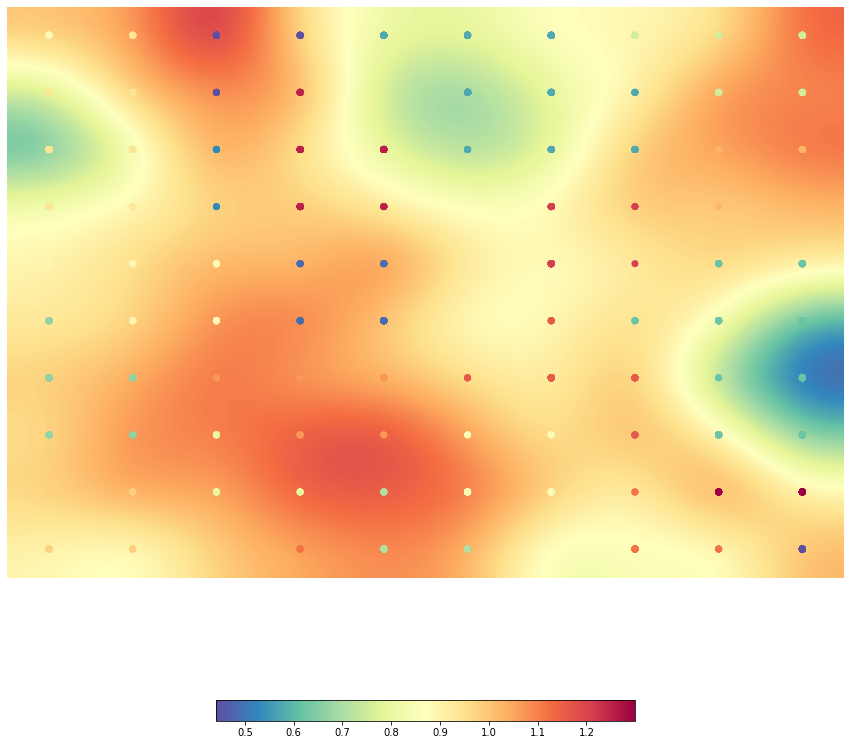

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som10.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
clusters = som10.clusters
print(clusters)

[[ 9 11  0  0  3  3  3  7  7  7]
 [11 11  0 18  3  3  3  3  7  7]
 [11 11  2 18 18  3  3  3 13 13]
 [11 11  2 18 18 17 17 17 13 13]
 [10 10 10  1  1 17 17 17  4  4]
 [ 5 10 10  1  1  4 16  4  4  4]
 [ 5  5 14 14 14 16 16 16  4  4]
 [ 5  5  8 14 14  9  9 16  4  4]
 [12 12  8  8  6  9  9 15 19 19]
 [12 12 12 15  6  6 15 15 15  0]]


In [ ]:
_, cl_unique = np.unique(clusters, return_counts = True)
cl_sorted = np.argsort(cl_unique)
print(cl_sorted)
print(cl_unique[cl_sorted])

[19  2  8  6 13  0  1  7 18 10 12 14 15 16  5  9 17 11  4  3]
[ 2  2  3  3  4  4  4  5  5  5  5  5  5  5  5  5  6  7 10 10]



## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

Τροποποιήσαμε την print_categories_stats έτσι ώστε να πέρνουμε και τις 2 κύριες κατηγορίες κάθε cluster.

In [ ]:
def print_categories_stats(movie_ids):
  n_movies = len(movie_ids)
  all_categories = []
  for movie_id in movie_ids:
    movie_cat = categories[movie_id][0].split(",  ")
    movie_cat = [x.replace('"', '') for x in movie_cat]
    all_categories.extend(movie_cat)
  all_unique_categories, counts_unique_categories = np.unique(all_categories, return_counts = True)
  sorted_indices = reversed(np.argsort(counts_unique_categories))
  n_movies = np.sum(counts_unique_categories)
  flag = 0 
  print('-'*100)
  print('{:<40} |   {:<30}   |   {:<8}(total: {})'.format('Category', 'Percentage %', 'Counts', n_movies))
  print('-'*100)
  for idx in sorted_indices:
    if flag==0: #1η κύρια κατηγορία
      first_category.append(all_unique_categories[idx])
      first_category_per.append(round(counts_unique_categories[idx]/n_movies,2))
      first_category_count.append(counts_unique_categories[idx])
      flag=1
    elif flag==1: #2η κύρια κατηγορία
      second_category.append(all_unique_categories[idx])
      second_category_per.append(round(counts_unique_categories[idx]/n_movies,2))
      second_category_count.append(counts_unique_categories[idx])
      flag=3
    print('{:<40} |   {:<30}   |   {:<5}'.format( all_unique_categories[idx], counts_unique_categories[idx]/n_movies, counts_unique_categories[idx] ))
  return

In [ ]:
def where_is_same4(a,b):
    return np.where(np.all(a==b,axis=1))[0]

def print_cluster_neurons_movies_report(cluster):
    cluster_bmus = np.column_stack(np.where(som.clusters==cluster)[::-1])
    li = [np.array(indices)[where_is_same4(bmu,bmus)] for bmu in cluster_bmus if bmu in bmus]
    li = [ind[0] for ind in li if len(ind)]
    return cluster_bmus

In [ ]:
def neuron_movies_report(neurons):
    id_list = []
    index = [where_is_same4(som.bmus,neuron) for neuron in neurons]
    index = [list(i) for i in index if len(i)]
    for i in index: id_list += i
    return id_list


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.


Δοκίμασαμε τους ακόλουθους χάρτες και clusters για 100 epochs και 2000 ταίνιες

In [ ]:
c = [1,2,3,4,5,6,7,8,9,10]
data1 = {
        'Map': ['10x10','10x10','20x20','20x20','20x20','30x30','30x30','30x30','30x30','35x35'],
        'Clusters': [10,20,20,15,18,18,25,20,30,25]}


df1 = pd.DataFrame(data1, index = c,columns = ['Map', 'Clusters'])
df1

,Map,Clusters
1,10x10,10
2,10x10,20
3,20x20,20
4,20x20,15
5,20x20,18
6,30x30,18
7,30x30,25
8,30x30,20
9,30x30,30
10,35x35,25


Για το τελικό μας μοντέλο επιλέξαμε χάρτι 30x30 με 20 clusters.

Επιλέξαμε τον 30x30 καθώς δεν είχε μεγάλη υπολογιστική πολυπλοκότητα και πρόσφερε πολύ καλή ανάλυση στα δεδομένα μας.

Επιλέξαμε 20 clusters καθώς οι όμαδες ταινιών που δημιουργούσε ήταν πολύ καλές χωρίς περιττές υπο ομάδες.

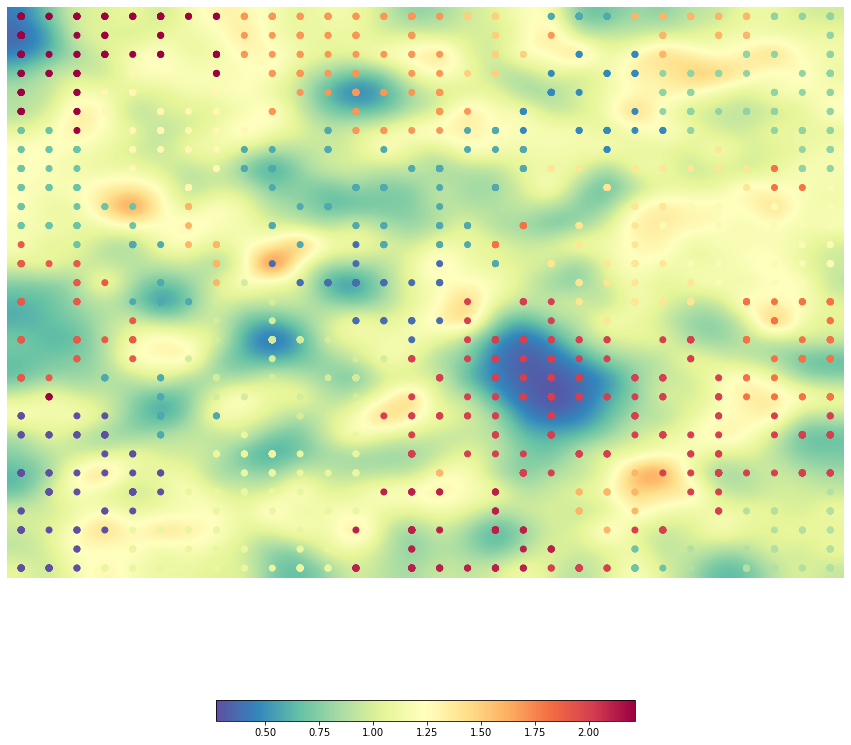

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#κατασκευή χάρτη
#n_rows, n_columns = 30 , 30
#som10 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
#%time som10.train(final_set_pca, epochs = 100)

#load τον χάρτη μας
som = joblib.load('map30_5000_20.pkl')
k = 20
algorithm = KMeans(n_clusters=k)
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
clusters = som.clusters
print(clusters)

[[19 19 19 19 19 19 19 19 14 14 14 14 14 14 14 14 12 12 12  3  3  3 13 13
  13 13 13  5  5  5]
 [19 19 19 19 19 19 19 19 14 14 14 14 14 14 14 14 12 12 12 14  3  3 13 13
  13 13 13  5  5  5]
 [19 19 19 19 19 19 19 19 14 14 14 14 14 14 14 14 12 12 12 12  2  2  2 13
   5  5  5  5  5  5]
 [19 19 19 19 10 19 19 19 14 14 14 14 14 14 14 14 12 12 12  2  2  2  2  5
   5  5  5  5  5  5]
 [19 19 19 10 10 10 10 10 10 14 14 14 14 14 14 14 14 12  2  2  2  2  2  5
   5  5  5  5  5  5]
 [19 19 19 10 10 10 10 10 10 14 14 14 14 14 14 14 14  2  2  2  2  2  2  5
   5  5  5  5  5  5]
 [ 4  4 19 10 10 10 10 10 10  3  3  3 14 14 14 14  3  3  2  2  2  2  2  2
   5  5  5  5  5  5]
 [ 4  4  4  4 10 10 10 10  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2 11
   5 11 11  5  5  5]
 [ 4  4  4 10 10 10 10 10  3  3  3  3  3  3  3  3  3  3  3 11 11 11 11 11
  11 11 11 15  5  5]
 [ 4  4  4  4 10 10 10 10  3  3  3  3  3  3  3  3  3  3  3 11 11 11 11 11
  11 11 11 15 15  9]
 [ 4  4  4  4  4 13 13 13  3  3  3  3  3  3  3  3 

In [ ]:
_, cl_unique = np.unique(clusters, return_counts = True)
cl_sorted = np.argsort(cl_unique)
print(cl_sorted)
print(cl_unique[cl_sorted])

[12  6  2  1  4  9 10 16 18 13 15 19  7  0  5 11 14  8  3 17]
[ 14  24  27  29  29  31  32  33  34  35  36  40  41  42  45  51  53  63
 100 141]


In [ ]:
first_category = []
first_category_per= []
first_category_count= []
second_category= []
second_category_per= []
second_category_count= []

c = []
for cluster in range(k):
  c.append(cluster)
  print()
  print('-'*100)
  print("Cluster:",cluster)
  cluster_neurons = print_cluster_neurons_movies_report(cluster)
  id_list = neuron_movies_report(cluster_neurons)
  print_categories_stats(id_list)


----------------------------------------------------------------------------------------------------
Cluster: 0
----------------------------------------------------------------------------------------------------
Category                                 |   Percentage %                     |   Counts  (total: 574)
----------------------------------------------------------------------------------------------------
Comedy                                   |   0.18815331010452963              |   108  
Romance Film                             |   0.18641114982578397              |   107  
Romantic comedy                          |   0.12195121951219512              |   70   
Drama                                    |   0.09059233449477352              |   52   
Romantic drama                           |   0.03484320557491289              |   20   
Indie                                    |   0.029616724738675958             |   17   
Musical                                  |   0.0278745

In [ ]:
data1 = {
        'First Category': first_category,
        'Persentage 1': first_category_per,
        'Number of Movies 1': first_category_count,
        'Second category': second_category,
        'Persentage 2': second_category_per,
        'Number of Movies 2': second_category_count}


df1 = pd.DataFrame(data1, index = c,columns = ['First Category', 'Persentage 1', 'Number of Movies 1','Second category', 'Persentage 2', 'Number of Movies 2'])
df1

,First Category,Persentage 1,Number of Movies 1,Second category,Persentage 2,Number of Movies 2
0,Comedy,0.19,108,Romance Film,0.19,107
1,Documentary,0.43,46,Music,0.07,7
2,Science Fiction,0.28,38,Action,0.10,14
3,Action,0.10,27,Short Film,0.08,24
4,Family Film,0.17,66,Adventure,0.13,50
5,Action/Adventure,0.15,115,Action,0.15,112
6,Drama,0.21,81,Comedy,0.21,81
7,Comedy film,0.48,67,Drama,0.13,18
8,Drama,0.22,133,Romance Film,0.22,133
9,Thriller,0.15,65,Crime Thriller,0.14,62


Clusters στον χάρτη

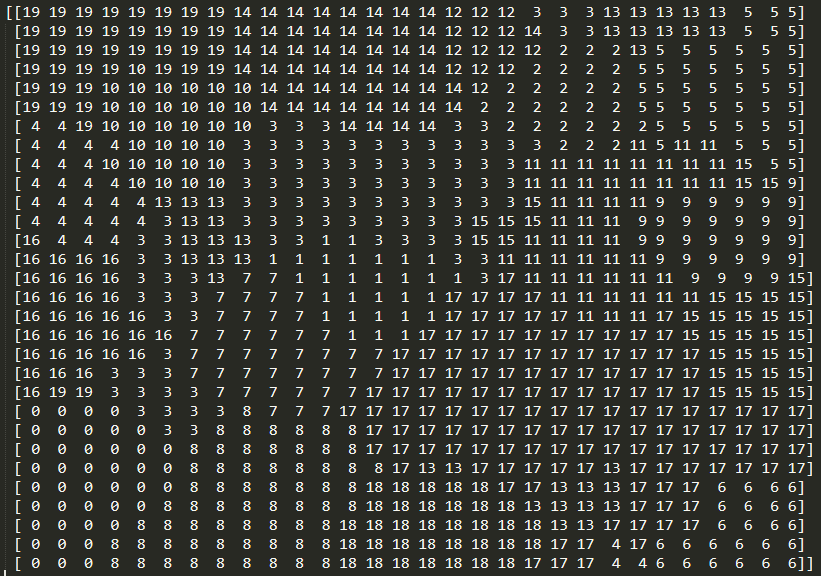



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 




In [ ]:
# εκτύπωση όλων των κατηγοριών

movies = [i for i in range(5000)]

print(print_categories_stats(movies))

----------------------------------------------------------------------------------------------------
Category                                 |   Percentage %                     |   Counts  (total: 17705)
----------------------------------------------------------------------------------------------------
Drama                                    |   0.1295679186670432               |   2294 
Comedy                                   |   0.07229596159277041              |   1280 
Thriller                                 |   0.043377576955662245             |   768  
Romance Film                             |   0.04269980231573002              |   756  
Action                                   |   0.039480372776051965             |   699  
World cinema                             |   0.03292855125670714              |   583  
Crime Fiction                            |   0.02976560293702344              |   527  
Horror                                   |   0.028918384637108163            


**1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.**

  Συχνές κατηγορίες ταινιών:
  Παρατηρούμε ότι οι κατηγόριες Drama και Comedy που έχουν την μεγαλύτερη πυκνότητα πιθανότητας βρίσκονται σε πολλούς clusters στην θέση της κυρίαρχης ή δευτερεύουσας κατηγορίας.

  Συγκεκριμένα η κατηγορία Drama βρίσκεται σαν κύρια κατηγορία στους clusters 6,8,17 και σαν δευτερεύουσα τους clusters 7,11,15,18. Δηλάδη σε όλο σχεδόν τον κάτω αριστέρα και κεντρικό μέρος του χάρτη μας.

  Αντιστοίχα, η κατηγόρια Comedy βρίσκεται σαν κύρια κατηγορία στους clusters 0,19 και σαν δευτερεύουσα στους clusters 6,10. Δηλάδη στις αριστέρα και κάτω δεξία άκρες του χάρτη μας.

  Λιγότερο Συχνές κατηγορίες ταινιών:
  Απο τις κύριες κατηγορίες ταινιών των clusters μας παρατηρούμε ότι οι λιγότερο συχνές είναι οι κατηγορίες Documentary και Music του cluster 1 (κέντρο του χάρτη) και οι Animation και Short Film του cluster 16 (κέντρο αριστέρα του χάρτη)



**2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.**

  Απο τον χάρτη παρατηρούμε ότι οι ταινίες Thriller, Horror και Action (clusters: 9,11,12,13,5) βρίσκονται στο πάνω δεξία μέρος του χάρτη, η οποία είναι η μόνη άκρη του χάρτη που δεν συναντουμέ cluster με κύρια κατηγορία την Comedy.



**3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.**

Όπως είδαμε και πρίν οι ταινίες Thriller, Horror και Action βρίσκονται στο πάνω δεξία μέρος του χάρτη.

Οι ταινίες Action όμως επειδή συνδυάζονται και με άλλες κατηγορίες μπορούν να βρεθόυν και πιο κόντα στο κέντρο από τις ταινίες Thriller και Horror.

Στις υπόλοιπες άκρες βρίσκονται ταινίες Comedy.

Οι ταινίες Drama συνδυάζονται με πολλές ταινίες έτσι καταλαμβάνουν σχέδον ολόκληρο το κάτω δεξία μισό του χάρτη.

Στο κέντρο αριστέρα βρίσκονται οι Family Film και Animation.




**Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.**

Αρχικά μπορούμε να δούμε οτι τα clusters έχουν σχηματιστεί αρκετά καλά καθως έχουν σχεδόν όλα αρκετή σαφήνεια μεταξύ τους. Δηλαδή παρατηρούμε οτί η μεγαλύτερη και πιο "κεντρική" μας κατηγορία είναι η Drama (cluster 17,6,8), και οι υπόλοιπες κατηγορίες είναι σαν να τοποθετούνται γύρω απο αυτήν. Πάνω απο την Drama βλέπουμε ταινίες Action, Horror και Thriller, ένω κάτω από αυτήν κατηγορίες Comedy.

Ιδιαίτερο ενδιαφέρον έχει το cluster 1 (Documentary & Music), καθώς βρίσκεται στο κέντρο του χάρτη μας χώρις όμως να έχει τοπολογική σαφήνεια με τους γύρω clusters.

Ακόμη, οι clusters 19 (Comendy, Indie) και 14 (Horror, Thriller) δεν έχουν τοπολογική σαφήνεια αφου είναι γειτονικοί ενώ οι νευρώνες τους έχουν απόσταση μεταξύ του.

Επίσης, παρατηρούμε ότι καποίοι clusters όπως οι 4,3 και 13, είναι διάσπαρτοι στο χάρτη μας.

Τα πιο πάνω ίσως να οφείλονται στο γεγονός ότι γίνεται τοποθέτηση σε 2 διαστάσεις.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ' ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, και αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.
